# Trapezoidal Rule in Python #

Here, we will write a function to approximate the integral of $sin(x)$ from a to b using the trapezoidal rule with N bins, where the trapezoidal rule for a function, $f(x)$, is:

$$ \int_{a}^{b} f(x) dx \approx \frac{\Delta x_k}{2} \sum_{k=1}^{N} f(x_{k-1})+f(x_k) $$

Since we will have equally spaced bins, this becomes:

$$ \int_{a}^{b} f(x) dx \approx \Delta x \left( \frac{f(x_0)+f(x_N)}{2} + \sum_{k=1}^{N-1}f(x_1) \right) $$

In [1]:
import numpy as np

def trapezoidal_rule_sinx(a, b, N):
    '''
    Approximates the integral of sin(x) from a to b using the trapezoidal rule.

    Parameters
    ----------
    a : float
        lower bound 
    b : float
        upper bound
    N : int
        Number of bins

    Returns
    -------
    numerical : float
        The numerical integration result
    exact : float
        The actual value of the integral
    '''
    x = np.linspace(a, b, N+1)
    numerical = ((b-a)/N)*((np.sin(x[0])+np.sin(x[-1]))/2 + np.sum(np.sin(x[1:-1])))
    exact = -np.cos(b)+np.cos(a)

    return numerical, exact

Using the function with a=0 and b=$\pi$, calculate the error:

$$ error = \int_{a}^{b}sin(x)dx\; \mathrm{(exact)}-\int_{a}^{b}sin(x)dx\; \mathrm{(numerical)} $$

for N ranging from 4 to 128. Plot error vs. N.


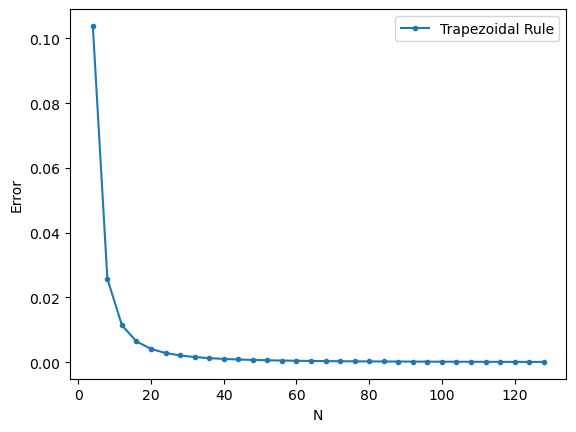

In [7]:
n_vals = list(range(4, 129, 4))
error_results = []
for n in n_vals:
    numerical, exact = trapezoidal_rule_sinx(0, np.pi, n)
    error_results.append(exact-numerical)

import matplotlib.pyplot as plt

fix, ax = plt.subplots()
ax.plot(n_vals, error_results, marker=".", label="Trapezoidal Rule")
ax.set_xlabel("N")
ax.set_ylabel("Error")

ax.legend()

plt.show()